In [11]:
%matplotlib notebook
import pywt
import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import xlsxwriter

#Change this for each participant
part_number = '205'

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [9, 4.5]  # Bigger images
plt.rcParams['font.size']= 14
pd.set_option('display.max_columns', None)

save_dir = '../data/part'+part_number+'/figures/'

p = '../data/part'+part_number+'/part'+part_number+'_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('../data/part'+part_number+'/part'+part_number+'_pilot_rsp_signals.p',"rb"))
baseline_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_ecg_signals.p'
baseline2_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_eda_signals.p'
baseline3_fn = '../data/part'+part_number+'/part'+part_number+'_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

data_file = '../data/part'+part_number+'/part'+part_number+'_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})

timestamps=np.loadtxt('../support/trigger timestamps/trigger timestamps.csv',dtype='int',delimiter=',')
start_times = timestamps[int(part_number[-2:]) - 1]
feedback_times = timestamps[int(part_number[-2:]) - 1 + 15]

taskloads_all = np.loadtxt('../support/taskload settings/taskload settings.csv',dtype='int',delimiter=',',encoding='UTF-8')
taskload_settings = taskloads_all[int(part_number[-2:]) - 1]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=20)

pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1
        
x_axis_pilot = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

<IPython.core.display.Javascript object>


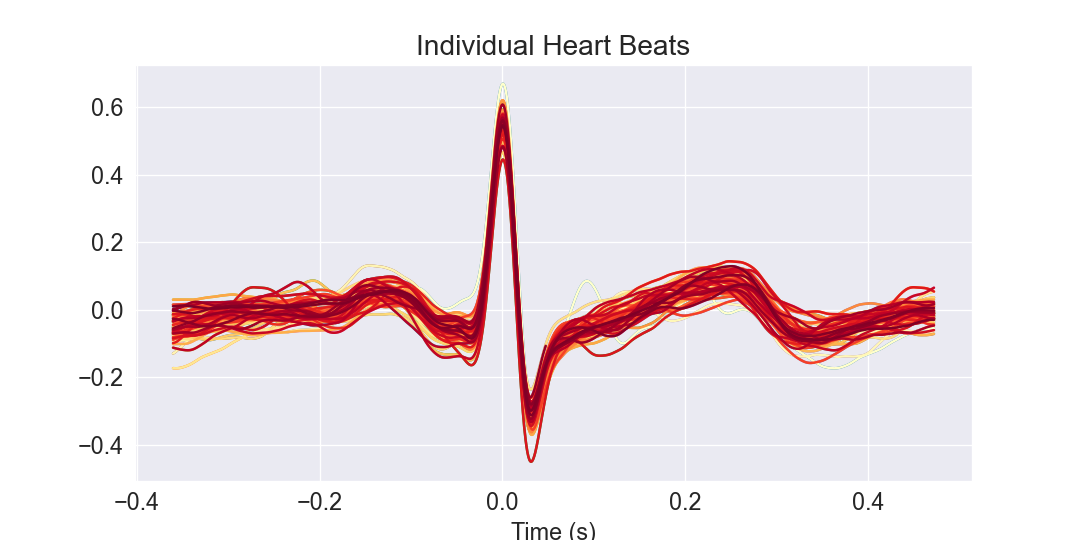

In [12]:
plt.close('all')
peaks = np.where(ecg_pilot_interval[1]["ECG_R_Peaks"] == 1)[0]
indv = nk.ecg_segment(ecg_pilot_interval[1]['ECG_Clean'],peaks,sampling_rate=2000,show=True)

<IPython.core.display.Javascript object>


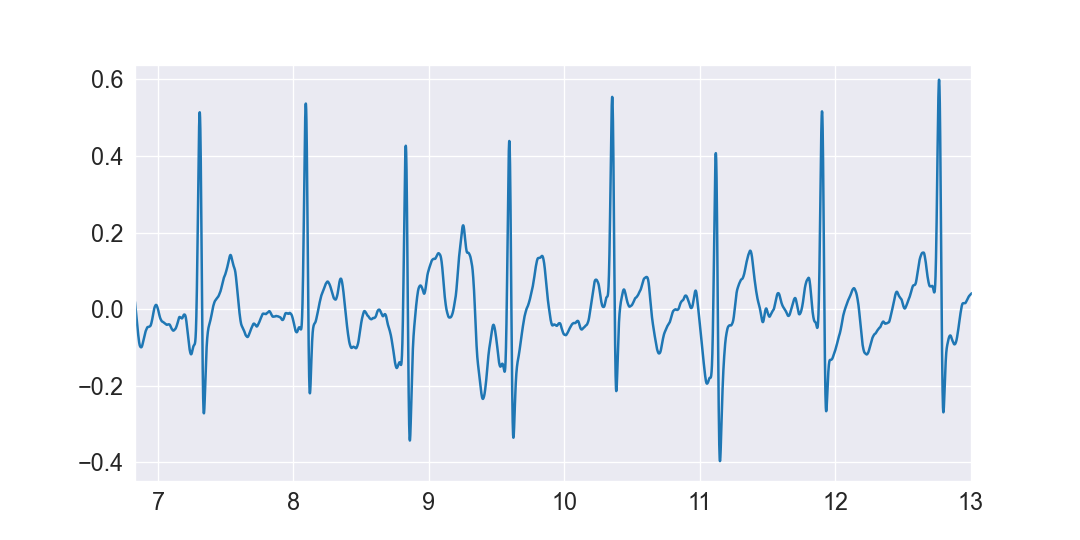

In [21]:
plt.figure()
plt.plot(x_axis_pilot,ecg_pilot_interval[7]['ECG_Clean'])
#plt.plot(indv['3']['Signal'])
np.savetxt('trial7part212.csv',ecg_pilot_interval[7]['ECG_Clean'])

In [22]:
np.savetxt('time.csv',x_axis_pilot)

In [18]:
cA, cD = pywt.dwt(ecg_pilot_interval[7]['ECG_Clean'], 'sym4')

<IPython.core.display.Javascript object>


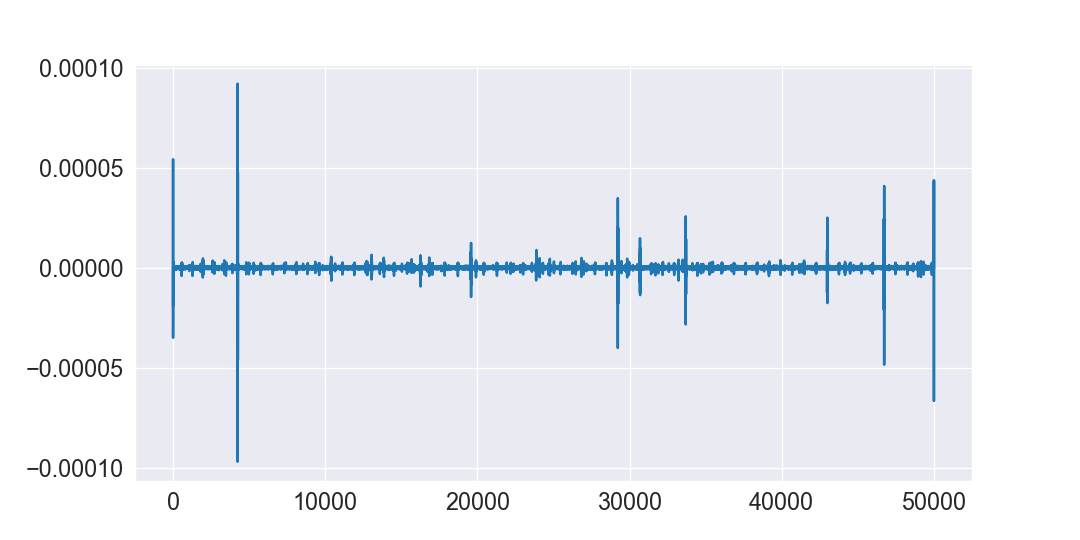

In [19]:
plt.figure()
plt.plot(cD)

<IPython.core.display.Javascript object>


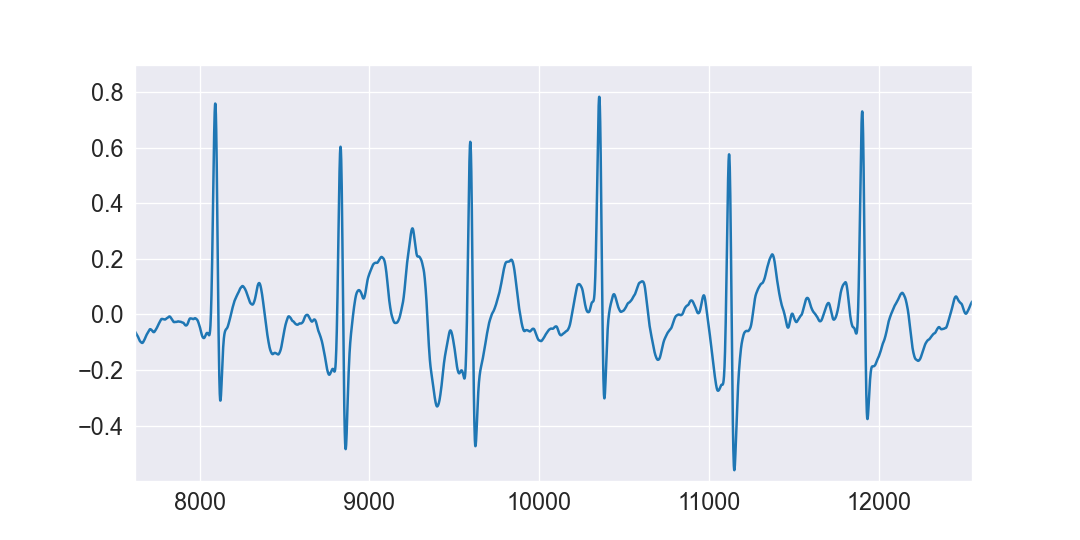

In [20]:
plt.figure()
plt.plot(cA)